In [331]:
import pennylane as qml
from pennylane import numpy as np
from qiskit import *
ai={"1":[],"10":[],"100":[],"1000":[],"No sampling":[]}
a=np.array([1,10,100,1000])


[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
Cost after step   500:  0.0000000
Cost after step  1000:  0.0000000
Cost after step  1500:  0.0000000
Cost after step  2000:  0.0000000
Optimized rotation angles: [ 1.85701028 -0.03951779]
Final fidelity: 0.9999999999999998


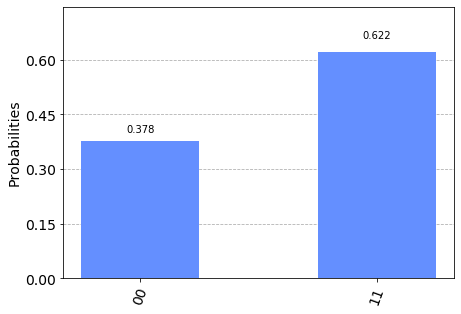

In [332]:
dev= qml.device('default.qubit', wires=2)
dev.analytic=False
dev.shots=a[0]
@qml.qnode(dev)
def circuit(x, target_observable=None):
    qml.RY(x[0], wires=0)
    qml.RX(x[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.Hermitian(target_observable, wires=[0, 1]))

target_state = (1/np.sqrt(2))* np.array([1,0,0,1])
target_herm_op = np.outer(target_state.conj(), target_state)
print(target_herm_op)

weights = np.array([0,0])

def cost(weights):
    return np.abs(circuit(weights, target_observable=target_herm_op)-1)**2
opt = qml.AdamOptimizer(stepsize=0.4)

for i in range(2000):
    weights = opt.step(cost, weights)

    if (i+1) % 500 == 0:
        print('Cost after step {:5d}: {: .7f}'.format(i+1, cost(weights)))

fidelity = circuit(weights, target_observable=target_herm_op)

print('Optimized rotation angles: {}'.format(weights))
print('Final fidelity: {}'.format(fidelity))
ai.update({"1":weights})
circuit1=QuantumCircuit(2,2)
circuit1.ry(weights[0],0)
circuit1.rx(weights[1],1)
circuit1.cx(0,1)
circuit1.draw(output='mpl')
circuit1.measure([0,1],[0,1])
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit1, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit1))


[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
Cost after step   500:  0.0000000
Cost after step  1000:  0.0000000
Cost after step  1500:  0.0000000
Cost after step  2000:  0.0100000
Optimized rotation angles: [1.76902388 0.09831412]
Final fidelity: 0.9999999999999998


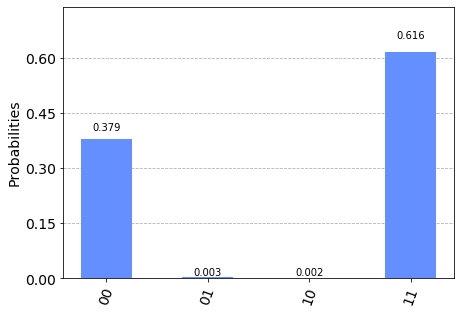

In [333]:
dev1= qml.device('default.qubit', wires=2)
dev1.analytic=False
dev1.shots=a[1]
@qml.qnode(dev1)
def circuit(x, target_observable=None):
    qml.RY(x[0], wires=0)
    qml.RX(x[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.Hermitian(target_observable, wires=[0, 1]))

target_state = (1/np.sqrt(2))* np.array([1,0,0,1])
target_herm_op = np.outer(target_state.conj(), target_state)
print(target_herm_op)

weights = np.array([0,0])

def cost(weights):
    return np.abs(circuit(weights, target_observable=target_herm_op)-1)**2
opt = qml.AdamOptimizer(stepsize=0.4)

for i in range(2000):
    weights = opt.step(cost, weights)

    if (i+1) % 500 == 0:
        print('Cost after step {:5d}: {: .7f}'.format(i+1, cost(weights)))

fidelity = circuit(weights, target_observable=target_herm_op)

print('Optimized rotation angles: {}'.format(weights))
print('Final fidelity: {}'.format(fidelity))
ai.update({"10":weights})
circuit1=QuantumCircuit(2,2)
circuit1.ry(weights[0],0)
circuit1.rx(weights[1],1)
circuit1.cx(0,1)
circuit1.draw(output='mpl')
circuit1.measure([0,1],[0,1])
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit1, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit1))


[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
Cost after step   500:  0.0000000
Cost after step  1000:  0.0009000
Cost after step  1500:  0.0000000
Cost after step  2000:  0.0000000
Optimized rotation angles: [1.38966646 0.05671623]
Final fidelity: 0.9899999999999999


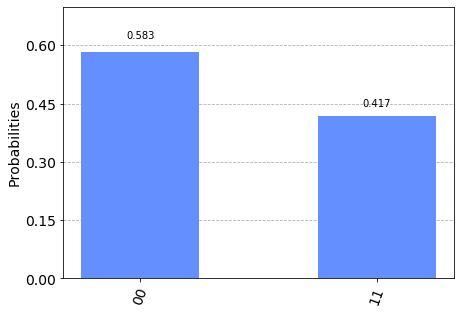

In [334]:
dev2= qml.device('default.qubit', wires=2)
dev2.analytic=False
dev2.shots=a[2]
@qml.qnode(dev2)
def circuit(x, target_observable=None):
    qml.RY(x[0], wires=0)
    qml.RX(x[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.Hermitian(target_observable, wires=[0, 1]))

target_state = (1/np.sqrt(2))* np.array([1,0,0,1])
target_herm_op = np.outer(target_state.conj(), target_state)
print(target_herm_op)

weights = np.array([0,0])

def cost(weights):
    return np.abs(circuit(weights, target_observable=target_herm_op)-1)**2
opt = qml.AdamOptimizer(stepsize=0.4)

for i in range(2000):
    weights = opt.step(cost, weights)

    if (i+1) % 500 == 0:
        print('Cost after step {:5d}: {: .7f}'.format(i+1, cost(weights)))

fidelity = circuit(weights, target_observable=target_herm_op)

print('Optimized rotation angles: {}'.format(weights))
print('Final fidelity: {}'.format(fidelity))
ai.update({"100":weights})
circuit1=QuantumCircuit(2,2)
circuit1.ry(weights[0],0)
circuit1.rx(weights[1],1)
circuit1.cx(0,1)
circuit1.draw(output='mpl')
circuit1.measure([0,1],[0,1])
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit1, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit1))


[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
Cost after step   500:  0.0000000
Cost after step  1000:  0.0000000
Cost after step  1500:  0.0000000
Cost after step  2000:  0.0000000
Optimized rotation angles: [1.57813258 0.0081678 ]
Final fidelity: 0.9999999999999999


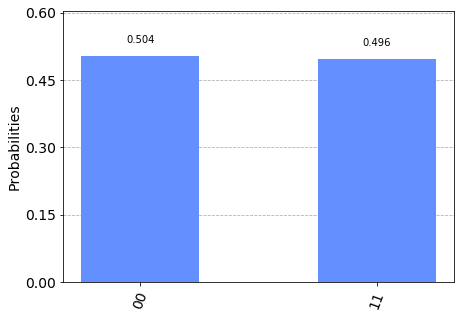

In [335]:
dev3= qml.device('default.qubit', wires=2)
dev3.analytic=False
dev3.shots=a[3]
@qml.qnode(dev3)
def circuit(x, target_observable=None):
    qml.RY(x[0], wires=0)
    qml.RX(x[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.Hermitian(target_observable, wires=[0, 1]))

target_state = (1/np.sqrt(2))* np.array([1,0,0,1])
target_herm_op = np.outer(target_state.conj(), target_state)
print(target_herm_op)

weights = np.array([0,0])

def cost(weights):
    return np.abs(circuit(weights, target_observable=target_herm_op)-1)**2
opt = qml.AdamOptimizer(stepsize=0.4)

for i in range(2000):
    weights = opt.step(cost, weights)

    if (i+1) % 500 == 0:
        print('Cost after step {:5d}: {: .7f}'.format(i+1, cost(weights)))

fidelity = circuit(weights, target_observable=target_herm_op)

print('Optimized rotation angles: {}'.format(weights))
print('Final fidelity: {}'.format(fidelity))
ai.update({"1000":weights})
circuit1=QuantumCircuit(2,2)
circuit1.ry(weights[0],0)
circuit1.rx(weights[1],1)
circuit1.cx(0,1)
circuit1.draw(output='mpl')
circuit1.measure([0,1],[0,1])
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit1, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit1))


[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
Cost after step   500:  0.0000001
Cost after step  1000:  0.0000000
Cost after step  1500:  0.0000000
Cost after step  2000:  0.0000000
Optimized rotation angles: [1.57150871 0.        ]
Final fidelity: 0.9999998731269044


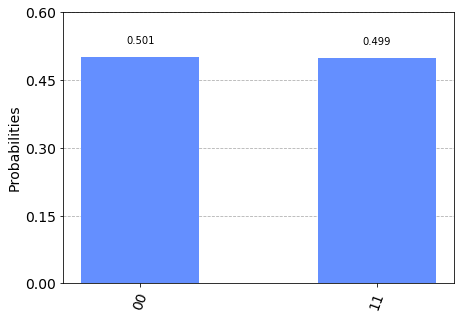

In [336]:
dev4= qml.device('default.qubit', wires=2)

@qml.qnode(dev4)
def circuit(x, target_observable=None):
    qml.RY(x[0], wires=0)
    qml.RX(x[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.Hermitian(target_observable, wires=[0, 1]))

target_state = (1/np.sqrt(2))* np.array([1,0,0,1])
target_herm_op = np.outer(target_state.conj(), target_state)
print(target_herm_op)

weights = np.array([0,0])

def cost(weights):
    return np.abs(circuit(weights, target_observable=target_herm_op)-1)**2
opt = qml.AdamOptimizer(stepsize=0.4)

for i in range(2000):
    weights = opt.step(cost, weights)

    if (i+1) % 500 == 0:
        print('Cost after step {:5d}: {: .7f}'.format(i+1, cost(weights)))

fidelity = circuit(weights, target_observable=target_herm_op)

print('Optimized rotation angles: {}'.format(weights))
print('Final fidelity: {}'.format(fidelity))
ai.update({"No sampling":weights})
circuit1=QuantumCircuit(2,2)
circuit1.ry(weights[0],0)
circuit1.rx(weights[1],1)
circuit1.cx(0,1)
circuit1.draw(output='mpl')
circuit1.measure([0,1],[0,1])
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit1, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit1))

In [337]:
print("Final Optimized angles for different shots are: ",ai)
print("\n\nThe procedure we used makes sure that we arrive at |00>+|11> and not at |00>-|11>, had we used a different method we could have differentiated between the two states using reverse EPR circuit, Quantum State Tomography or non destructive description circuit")
print("\n\nAs we increase the number of shots we can see the optimized angles start resembling like the No sampling case")

Final Optimized angles for different shots are:  {'1': array([ 1.85701028, -0.03951779]), '10': array([1.76902388, 0.09831412]), '100': array([1.38966646, 0.05671623]), '1000': array([1.57813258, 0.0081678 ]), 'No sampling': array([1.57150871, 0.        ])}


The procedure we used makes sure that we arrive at |00>+|11> and not at |00>-|11>, had we used a different method we could have differentiated between the two states using reverse EPR circuit, Quantum State Tomography or non destructive description circuit


As we increase the number of shots we can see the optimized angles start resembling like the No sampling case
